In [1]:
import models
import model_setup
import torch
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product
from datetime import datetime
from torchvision import transforms
import seaborn as sns
import scipy.stats as stats

# Setup data

In [2]:
# Load new dataset
dataset = model_setup.load_data(max_files=30_000)

Processing Data: 100%|██████████| 30000/30000 [05:54<00:00, 84.73image/s] 


Split the data into training, testing, and validation sets

In [3]:
loader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
train_subset, test_subset, val_subset = random_split(loader.dataset,[0.7,0.2,0.1])
val_size = len(val_subset.indices)
del loader

In [4]:
train_transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
            transforms.GaussianBlur(kernel_size=3),
            transforms.ToTensor()
            # Add any additional preprocessing steps here
        ])

for idx in tqdm(train_subset.indices, total=len(train_subset.indices)):
    input, label = train_subset.dataset.data[idx]
    new_input = train_transform(input*255) / 255
    train_subset.dataset.data[idx] = (new_input, label)



100%|██████████| 21000/21000 [07:23<00:00, 47.34it/s]


In [5]:
train = DataLoader(train_subset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test = DataLoader(test_subset,batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val = DataLoader(val_subset, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

# Training

Make a parameter grid

In [6]:
param_grid = {
    'filters': [64, 128],
    'num_conv_layers': [4, 8]
}

# Get all combinations of parameters
combinations = list(product(*param_grid.values()))
combinations

[(64, 4), (64, 8), (128, 4), (128, 8)]

Train all combinations

In [7]:
saved_models = []

model = models.OccModel()
training_info = model.train_model(train, test, epochs=50 , early_stopping_patience=10)
torch.save(model.state_dict(), f"models/points_{datetime.now().strftime('%Y%m%d-%H%M%S')}.pt")
saved_models.append(model)

Epoch 1/50 (Training): 100%|██████████| 329/329 [04:35<00:00,  1.19it/s] 


Loss: 0.0106, Mean Absolute Error: 0.0892052672644879, Time remaining: 4:07:53.079760


Epoch 2/50 (Training): 100%|██████████| 329/329 [02:11<00:00,  2.51it/s]


Loss: 0.0019, Mean Absolute Error: 0.07644016248114566, Time remaining: 3:07:29.587008


Epoch 3/50 (Training): 100%|██████████| 329/329 [02:19<00:00,  2.36it/s]


Loss: 0.0013, Mean Absolute Error: 0.06783335093171039, Time remaining: 2:48:28.653780


Epoch 4/50 (Training): 100%|██████████| 329/329 [03:05<00:00,  1.78it/s]


Loss: 0.0009, Mean Absolute Error: 0.06387285313549194, Time remaining: 2:46:16.033432


Epoch 5/50 (Training): 100%|██████████| 329/329 [02:12<00:00,  2.48it/s]


Loss: 0.0008, Mean Absolute Error: 0.062351948304220715, Time remaining: 2:35:26.123460


Epoch 6/50 (Training): 100%|██████████| 329/329 [02:31<00:00,  2.18it/s]


Loss: 0.0007, Mean Absolute Error: 0.06904632709127792, Time remaining: 2:29:52.873604


Epoch 7/50 (Training): 100%|██████████| 329/329 [02:12<00:00,  2.49it/s]


Loss: 0.0007, Mean Absolute Error: 0.06179549766981855, Time remaining: 2:23:03.169671


Epoch 8/50 (Training): 100%|██████████| 329/329 [02:18<00:00,  2.38it/s]


Loss: 0.0007, Mean Absolute Error: 0.061868111484069774, Time remaining: 2:17:52.787166


Epoch 9/50 (Training): 100%|██████████| 329/329 [03:04<00:00,  1.78it/s]


Loss: 0.0008, Mean Absolute Error: 0.06451576432966172, Time remaining: 2:17:01.001717


Epoch 10/50 (Training): 100%|██████████| 329/329 [02:26<00:00,  2.25it/s]


Loss: 0.0006, Mean Absolute Error: 0.055016524019710564, Time remaining: 2:12:46.557240


Epoch 11/50 (Training): 100%|██████████| 329/329 [02:20<00:00,  2.34it/s]


Loss: 0.0004, Mean Absolute Error: 0.05352570603978127, Time remaining: 2:08:12.443460


Epoch 12/50 (Training): 100%|██████████| 329/329 [03:15<00:00,  1.68it/s]


Loss: 0.0003, Mean Absolute Error: 0.05048117937242731, Time remaining: 2:07:04.447566


Epoch 13/50 (Training): 100%|██████████| 329/329 [02:25<00:00,  2.26it/s]


Loss: 0.0003, Mean Absolute Error: 0.05244333988570787, Time remaining: 2:02:58.994693


Epoch 14/50 (Training): 100%|██████████| 329/329 [03:04<00:00,  1.78it/s]


Loss: 0.0002, Mean Absolute Error: 0.05035918303071819, Time remaining: 2:00:50.475564


Epoch 15/50 (Training): 100%|██████████| 329/329 [02:25<00:00,  2.26it/s]


Loss: 0.0002, Mean Absolute Error: 0.05156454265593214, Time remaining: 1:56:54.255640


Epoch 16/50 (Training): 100%|██████████| 329/329 [02:19<00:00,  2.36it/s]


Loss: 0.0003, Mean Absolute Error: 0.05161704453936917, Time remaining: 1:52:44.377146


Epoch 17/50 (Training): 100%|██████████| 329/329 [02:21<00:00,  2.33it/s]


Loss: 0.0004, Mean Absolute Error: 0.0526036670074818, Time remaining: 1:48:58.118697


Epoch 18/50 (Training): 100%|██████████| 329/329 [02:25<00:00,  2.26it/s]


Loss: 0.0003, Mean Absolute Error: 0.0489874717165181, Time remaining: 1:45:15.579680


Epoch 19/50 (Training): 100%|██████████| 329/329 [03:05<00:00,  1.78it/s]


Loss: 0.0002, Mean Absolute Error: 0.04751470637448291, Time remaining: 1:42:46.801790


Epoch 20/50 (Training): 100%|██████████| 329/329 [02:22<00:00,  2.31it/s]


Loss: 0.0001, Mean Absolute Error: 0.04861892440772437, Time remaining: 1:39:00.074100


Epoch 21/50 (Training): 100%|██████████| 329/329 [02:21<00:00,  2.33it/s]


Loss: 0.0001, Mean Absolute Error: 0.047514301467132064, Time remaining: 1:35:02.179694


Epoch 22/50 (Training): 100%|██████████| 329/329 [02:20<00:00,  2.33it/s]


Loss: 0.0001, Mean Absolute Error: 0.04561683159083762, Time remaining: 1:31:20.950636


Epoch 23/50 (Training): 100%|██████████| 329/329 [02:20<00:00,  2.34it/s]


Loss: 0.0001, Mean Absolute Error: 0.047851883548688384, Time remaining: 1:27:44.831547


Epoch 24/50 (Training): 100%|██████████| 329/329 [03:09<00:00,  1.74it/s]


Loss: 0.0001, Mean Absolute Error: 0.049137633828882206, Time remaining: 1:25:08.669410


Epoch 25/50 (Training): 100%|██████████| 329/329 [02:17<00:00,  2.40it/s]


Loss: 0.0002, Mean Absolute Error: 0.04732343078927791, Time remaining: 1:21:28.512225


Epoch 26/50 (Training): 100%|██████████| 329/329 [02:27<00:00,  2.23it/s]


Loss: 0.0001, Mean Absolute Error: 0.0445046479358001, Time remaining: 1:18:08.395320


Epoch 27/50 (Training): 100%|██████████| 329/329 [02:22<00:00,  2.30it/s]


Loss: 0.0001, Mean Absolute Error: 0.04499079768565741, Time remaining: 1:14:49.892836


Epoch 28/50 (Training): 100%|██████████| 329/329 [02:34<00:00,  2.13it/s]


Loss: 0.0001, Mean Absolute Error: 0.04509799309233402, Time remaining: 1:11:30.583374


Epoch 29/50 (Training): 100%|██████████| 329/329 [03:05<00:00,  1.77it/s]


Loss: 0.0001, Mean Absolute Error: 0.045075427542658565, Time remaining: 1:08:36.169491


Epoch 30/50 (Training): 100%|██████████| 329/329 [02:17<00:00,  2.40it/s]


Loss: 0.0001, Mean Absolute Error: 0.044292921675963604, Time remaining: 1:05:07.555280


Epoch 31/50 (Training): 100%|██████████| 329/329 [02:29<00:00,  2.21it/s]


Loss: 0.0001, Mean Absolute Error: 0.04494969489330307, Time remaining: 1:01:46.594822


Epoch 32/50 (Training): 100%|██████████| 329/329 [03:04<00:00,  1.78it/s]


Loss: 0.0001, Mean Absolute Error: 0.04477767735481896, Time remaining: 0:58:48.525114
Early stopping at epoch 32 due to no improvement in validation loss.
Best Validation Loss: 0.0001 at epoch 22


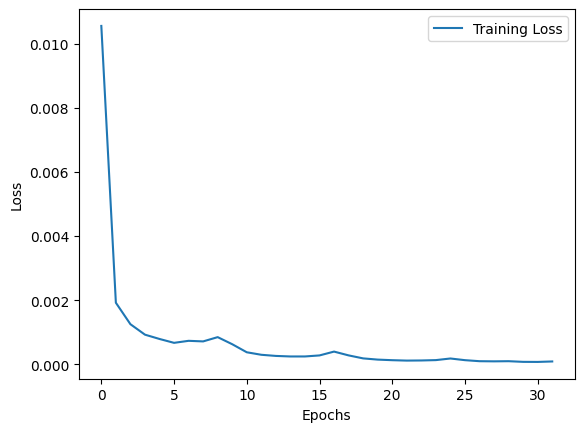

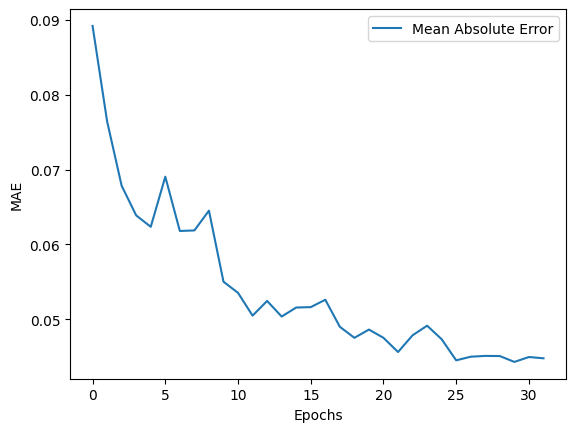

In [8]:
# Plot loss and root mean square error
# Plot training loss
plt.plot(training_info['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation accuracy
plt.plot(training_info['mae'], label='Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


# Validation

--------------------------------------------------------


Evaluating: 100%|██████████| 94/94 [00:26<00:00,  3.61it/s]


[0.04665502533316612, 0.028409359976649284, 0.050619348883628845, 0.029712988063693047, 0.027735143899917603, 0.025805125012993813, 0.022259851917624474, 0.06658805161714554, 0.03480224311351776, 0.01883157156407833, 0.03405831381678581, 0.030422186478972435, 0.026978416368365288, 0.06021319329738617, 0.0971686989068985, 0.038204941898584366, 0.024859940633177757, 0.050273820757865906, 0.03664654493331909, 0.038759589195251465, 0.020972181111574173, 0.03257967159152031, 0.03632939234375954, 0.04789202660322189, 0.048350073397159576, 0.021863732486963272, 0.035776134580373764, 0.07700417935848236, 0.04857825115323067, 0.028394578024744987, 0.053566936403512955, 0.10918102413415909, 0.04989470914006233, 0.04663322493433952, 0.03773404285311699, 0.08890890330076218, 0.05870245769619942, 0.03560257703065872, 0.02442357875406742, 0.025202162563800812, 0.10155005007982254, 0.12844444811344147, 0.028314877301454544, 0.058665044605731964, 0.057993028312921524, 0.06800834834575653, 0.0525976270

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


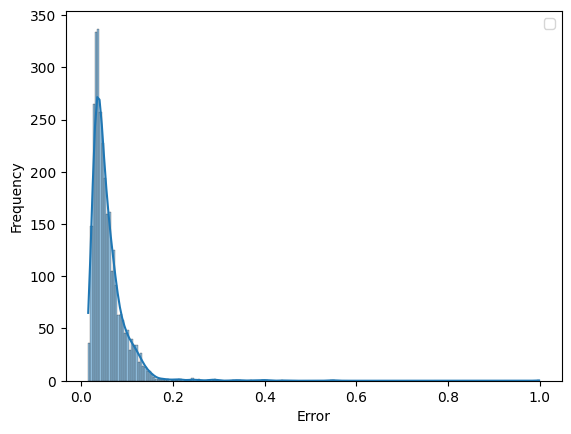

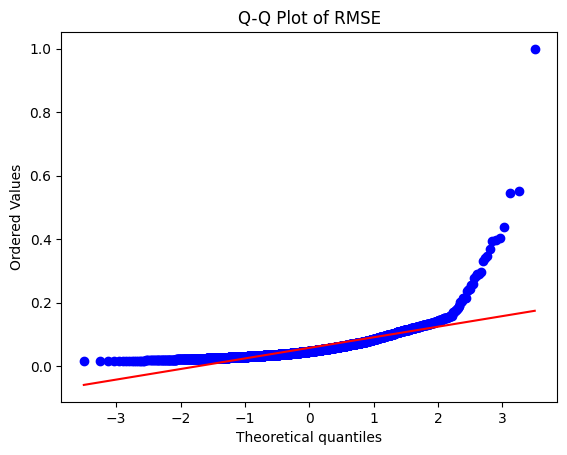

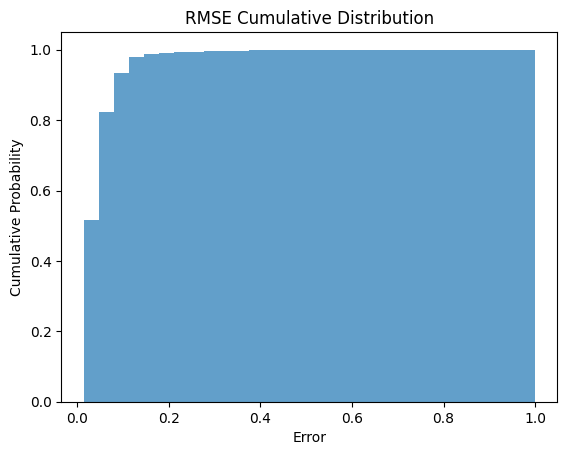

(3000, 21, 3)


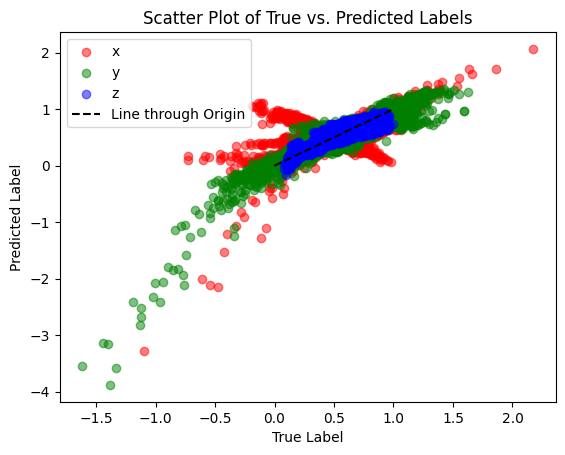

In [9]:
for idx, model in enumerate(saved_models):
    true_labels = []
    predicted_labels = []
    num_layers, filters = combinations[idx]
    print("--------------------------------------------------------")

    # Set the model to evaluation mode
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    rmse_list = []
    # Loop through the validation dataloader
    with torch.no_grad():
        for inputs, labels in tqdm(val, total=len(val), desc="Evaluating"):
            outputs = model(inputs.to(device))
            true_labels.extend(labels.tolist())
            predicted_labels.extend(outputs.tolist())
            for output, label in zip(outputs, labels.to(device)):
                mse = nn.MSELoss()(output, label)
                rmse = torch.sqrt(mse)
                rmse_list.append(float(rmse))

    print(rmse_list)

    sns.histplot(rmse_list, kde=True)
    # plt.hist(rmse_list, kde=True)
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    
    

    stats.probplot(rmse_list, dist="norm", plot=plt)
    plt.title("Q-Q Plot of RMSE")
    plt.show()
    
    plt.hist(rmse_list, cumulative=True, density=True, bins=30, alpha=0.7)
    plt.xlabel('Error')
    plt.ylabel('Cumulative Probability')
    plt.title(f'RMSE Cumulative Distribution')
    plt.show()
    import numpy as np
    print(np.array(true_labels).shape)
    true_array = np.array(true_labels)
    pred_array = np.array(predicted_labels)
    plt.scatter(true_array[:, :, 0], pred_array[:, :, 0], alpha=0.5, c='r', label="x")
    plt.scatter(true_array[:, :, 1], pred_array[:, :, 1], alpha=0.5, c='g', label="y")
    plt.scatter(true_array[:, :, 2], pred_array[:, :, 2], alpha=0.5, c='b', label="z")
    line_x = np.linspace(0, 1, 100)
    line_y = line_x  # y = x for the line going through the origin

    plt.plot(line_x, line_y, color='black', linestyle='--', label='Line through Origin')
    plt.legend()
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.title('Scatter Plot of True vs. Predicted Labels')
    plt.show()

In [10]:
# from PIL import Image
# from os import listdir
# import torch.nn.functional as F

# image_head = "../images/"
# paths = listdir(image_head)

# transform = transforms.Compose({
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()
# })

# for path in paths:
#     image = Image.open(image_head+path)
#     image = transform(image) / 255
#     output = model(torch.stack([image]).to(device))
#     print(torch.argmax(output),F.softmax(output, dim=1).tolist())

In [11]:
old_model = model

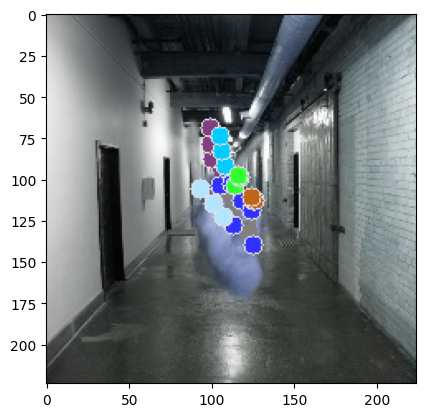

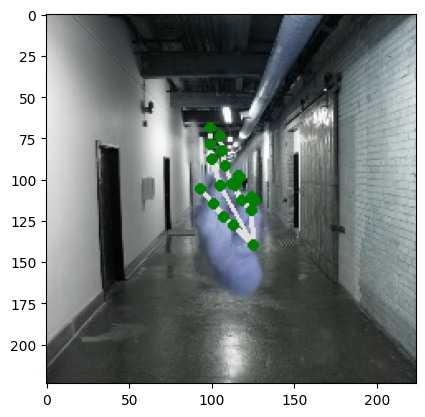

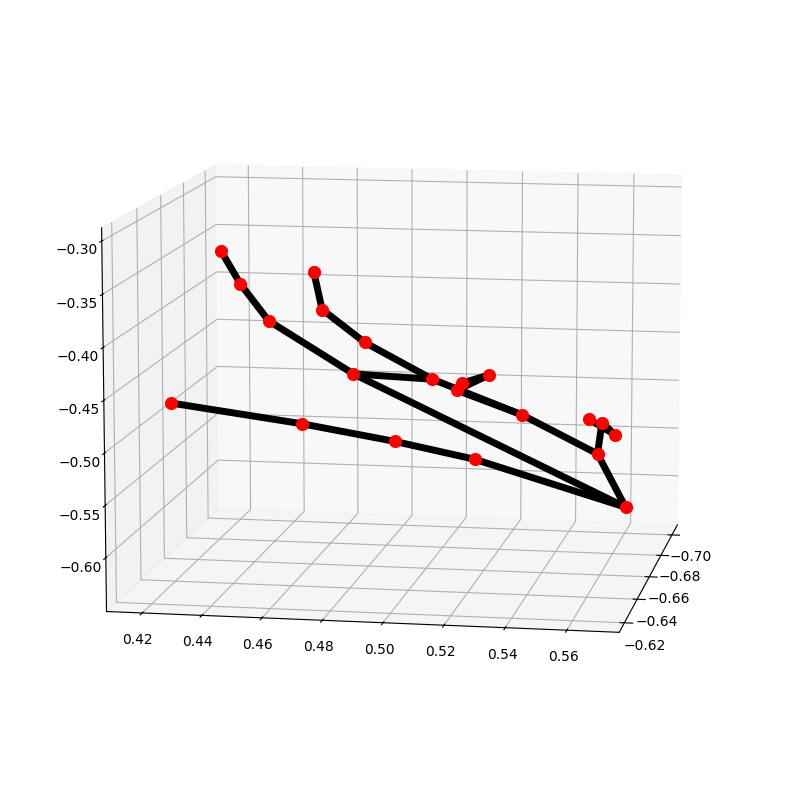

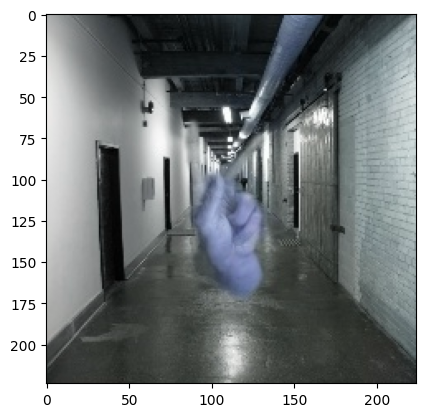

In [19]:
import cv2
from PIL import Image
import mediapipe as mp
import mediapipe.framework.formats.landmark_pb2 as landmark_pb2
from google.protobuf import text_format
import points_displayer
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
import models
from importlib import reload

reload(models)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# file = "/home/devcontainers/third-year-project/data/freihand/left/training/rgb/00090000.jpg"
file = "/home/devcontainers/third-year-project/data/EgoDexter/data/Desk/color/image_00001_color.png"
image = Image.open(file)

model = models.OccModel().to(device)


model.load_state_dict(torch.load("models/points_20231228-024753.pt"))
# model = old_model
model.eval()
transform = transforms.Compose({
    # transforms.Resize((224, 224)),
    transforms.ToTensor()
})

# image.resize(224,224)

image = transform(image) / 255

joints = model(torch.stack([image]).to(device))



mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

landmarks = ""
for X, Y, Z in joints[0]:
    formatted_string = f"landmark {{x: {X} y: {Y} z: {Z}}} "
    landmarks = landmarks + formatted_string

hand_landmarks = text_format.Parse(
    landmarks,
    landmark_pb2.NormalizedLandmarkList())

img = cv2.imread(file)
img2 = cv2.imread(file)
# img = cv2.resize(img, (224,224))
mp_drawing.draw_landmarks(
            img,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
points_displayer.draw_landmarks(img2, joints.cpu().detach().numpy().tolist()[0])
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()

mp_drawing.plot_landmarks(
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS)
plt.imshow(cv2.imread(file))